### Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
### Prediction:
Need  to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import important library

In [2]:
df_titanic=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Load dataset and displayed as per aboveb 891 rows and 12 columns are present.

In [3]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checked Null vallue present in dataset as per aboveb column Age,Cabin and Embarked have Null Value

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Displayed details informations about Dataset. As per aboveb there are two columns have float64 dtype, five int64 dtype and five object dtype.

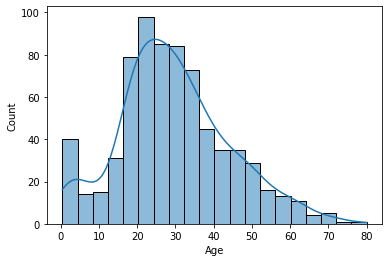

In [5]:
sns.histplot(df_titanic.Age,kde=True)

As pe above Age is normally distrubuted hence null value can be replaced by Mean.

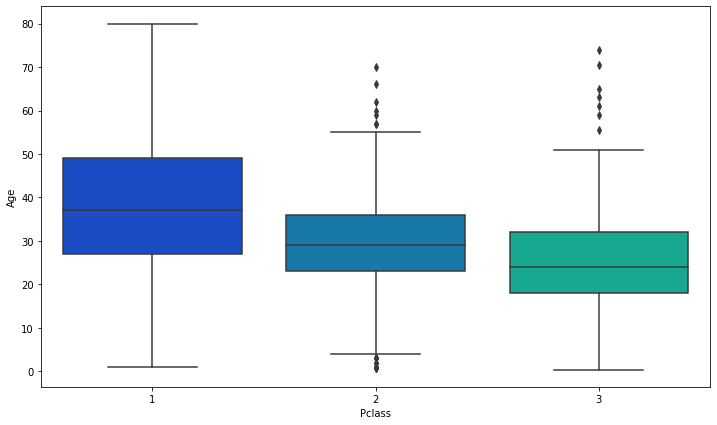

In [6]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_titanic,palette='winter')


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
df_titanic['Age'] = df_titanic[['Age','Pclass']].apply(impute_age,axis=1)

Let's go ahead and drop the Cabin column and Embarked null value fill by mode.

In [9]:
df_titanic=df_titanic.drop('Cabin',axis=1)
df_titanic['Embarked']=df_titanic.fillna(df_titanic.Embarked.mode())
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,5
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,887
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,888
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,889
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,890


In [10]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As we can see that there is no any null value

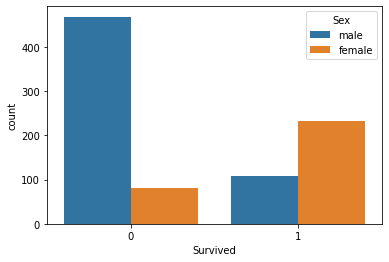

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df_titanic)

As per aboveb result we can see that male survived count is high as compaired to female.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


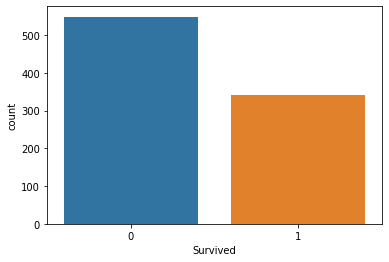

In [12]:
sns.countplot(df_titanic.Survived)

Aboveb results cleared that data is imbalanced

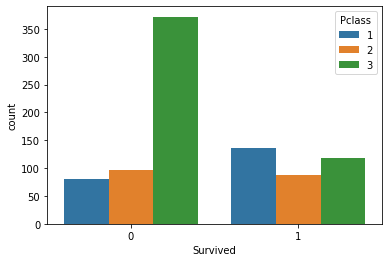

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=df_titanic)

Less no of pclass=3 has been survived as compaired to pclass=1$2.

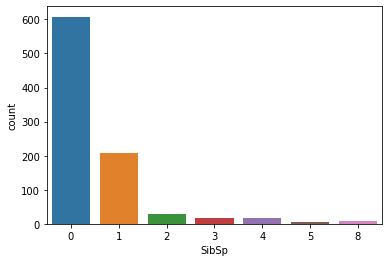

In [14]:
sns.countplot(x='SibSp',data=df_titanic)

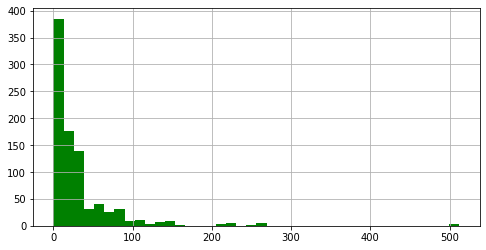

In [15]:
df_titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

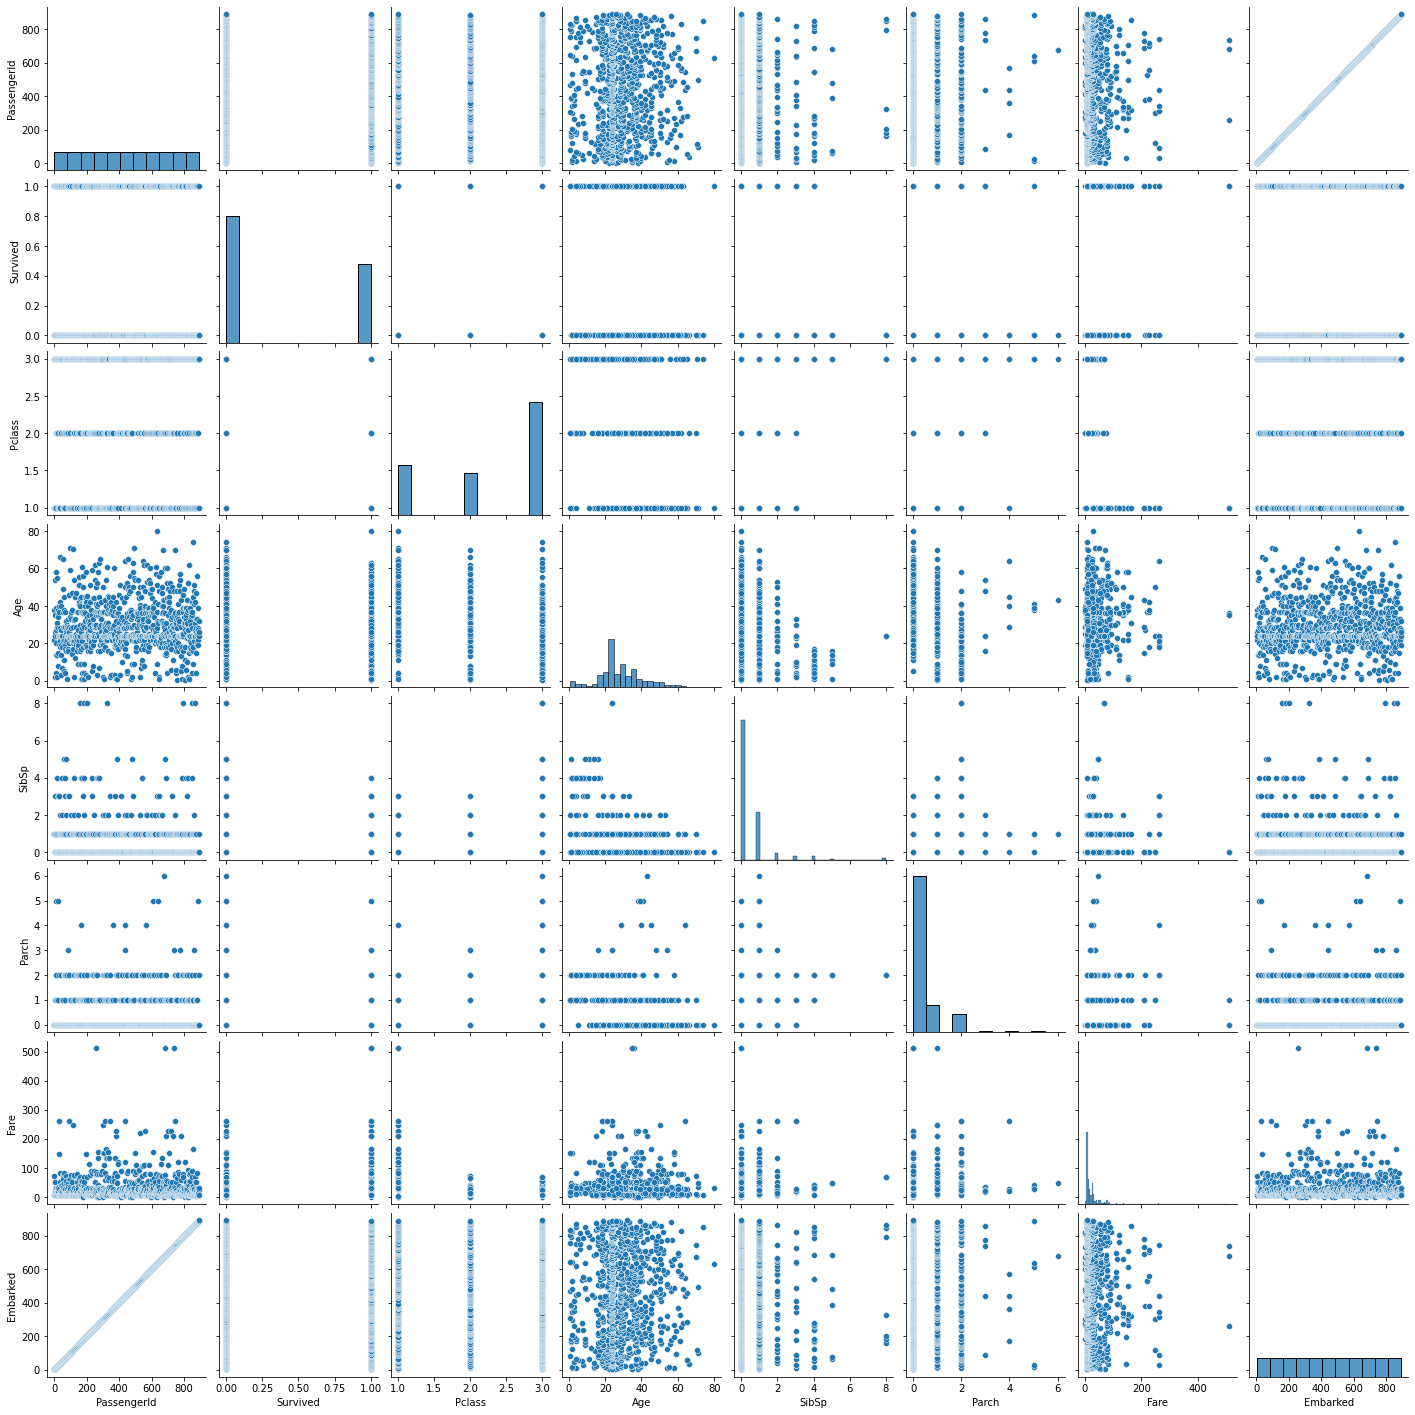

In [16]:
sns.pairplot(df_titanic)

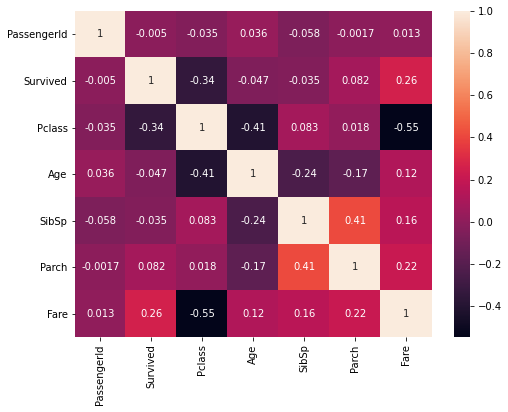

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df_titanic.corr(),annot=True)

Above results also confirmed by negative correlations of pclass.

### Converting Categorical Features

In [18]:
df_titanic['Sex']= pd.get_dummies(df_titanic['Sex'],drop_first=True)
df_titanic['Embarked']= pd.get_dummies(df_titanic['Embarked'],drop_first=True)

Convert object dtype to integer using one hot coding both columns.

In [19]:
df_titanic.drop(['Name','Ticket'],axis=1,inplace=True)

Name and Ticket is unique identification which is not impect the results hence droped both columns

In [20]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
888,889,0,3,0,24.0,1,2,23.4500,0
889,890,1,1,1,26.0,0,0,30.0000,0


Final dataset has been displaced there is 891 rows and 9 columns

In [21]:
df_x=df_titanic.drop(columns=['Survived'])
y=df_titanic[['Survived']]
print(df_x.shape,y.shape)

(891, 8) (891, 1)


seprate dependent and independent variable

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

Scaled dataset in same scale.

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,90):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

create a functions to find out max r2 score corresponding to random state.

In [24]:
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

create functions to check Mean r2 score for regressor and standard deviation in r2 score for regressor

### Lets use DecisionTreeRegressor.

In [25]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)

r2 score corresponding to  42  is  0.0785070785070785
r2 score corresponding to  43  is  -0.06126482213438744
r2 score corresponding to  44  is  -0.3185577668648232
r2 score corresponding to  45  is  0.1363385718224428
r2 score corresponding to  46  is  0.17384615384615387
r2 score corresponding to  47  is  -0.26684141546526874
r2 score corresponding to  48  is  -0.28390714658320304
r2 score corresponding to  49  is  0.0095816464237517
r2 score corresponding to  50  is  -0.022467631378522368
r2 score corresponding to  51  is  -0.0037819509650496297
r2 score corresponding to  52  is  -0.10404934298739588
r2 score corresponding to  53  is  -0.10404934298739588
r2 score corresponding to  54  is  0.0696961620469081
r2 score corresponding to  55  is  -0.037681159420289934
r2 score corresponding to  56  is  0.09373289545703334
r2 score corresponding to  57  is  -0.17976221245799984
r2 score corresponding to  58  is  -0.0037819509650494076
r2 score corresponding to  59  is  -0.223544303797468

### Lets try for RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [27]:
rfr=RandomForestRegressor(n_estimators=10)
r_state=maxr2_score(rfr,x,y)

r2 score corresponding to  42  is  0.42176319176319166
r2 score corresponding to  43  is  0.20145718050065875
r2 score corresponding to  44  is  0.2257521323339361
r2 score corresponding to  45  is  0.43097049903501516
r2 score corresponding to  46  is  0.4967346153846154
r2 score corresponding to  47  is  0.2666395806028833
r2 score corresponding to  48  is  0.2011763171622326
r2 score corresponding to  49  is  0.4634831309041836
r2 score corresponding to  50  is  0.3099479563340949
r2 score corresponding to  51  is  0.3412389149713093
r2 score corresponding to  52  is  0.28140788415124707
r2 score corresponding to  53  is  0.3536511128989006
r2 score corresponding to  54  is  0.3652465351812365
r2 score corresponding to  55  is  0.3625335968379446
r2 score corresponding to  56  is  0.3396496989600438
r2 score corresponding to  57  is  0.3892995606099765
r2 score corresponding to  58  is  0.3354029733959313
r2 score corresponding to  59  is  0.2894379746835444
r2 score corresponding t

### Lets try for KNN

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 20}

In [29]:
knr=KNeighborsRegressor(n_neighbors=20)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.41617664092664086
r2 score corresponding to  43  is  0.26584057971014485
r2 score corresponding to  44  is  0.25854258206254843
r2 score corresponding to  45  is  0.4805076509511993
r2 score corresponding to  46  is  0.45760705128205137
r2 score corresponding to  47  is  0.4729705111402358
r2 score corresponding to  48  is  0.3670921361502347
r2 score corresponding to  49  is  0.46312078272604584
r2 score corresponding to  50  is  0.3599920665143439
r2 score corresponding to  51  is  0.29542677360459046
r2 score corresponding to  52  is  0.38659258514347017
r2 score corresponding to  53  is  0.41827400107267354
r2 score corresponding to  54  is  0.41343150319829414
r2 score corresponding to  55  is  0.3787473649538867
r2 score corresponding to  56  is  0.46640462506841807
r2 score corresponding to  57  is  0.419776751098475
r2 score corresponding to  58  is  0.4042670839853939
r2 score corresponding to  59  is  0.28819177215189873
r2 score correspon

### Lets try for SVR

In [30]:
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [31]:
svr=SVR(kernel="rbf",C=1)
r_state=maxr2_score(svr,x,y)

r2 score corresponding to  42  is  0.33168545336681576
r2 score corresponding to  43  is  0.20080806719591415
r2 score corresponding to  44  is  0.20415732768099992
r2 score corresponding to  45  is  0.4484202922561763
r2 score corresponding to  46  is  0.481338579581449
r2 score corresponding to  47  is  0.40595819866699034
r2 score corresponding to  48  is  0.3920616985652119
r2 score corresponding to  49  is  0.4656452182482481
r2 score corresponding to  50  is  0.3826475443773125
r2 score corresponding to  51  is  0.2874435366956313
r2 score corresponding to  52  is  0.4138684568074922
r2 score corresponding to  53  is  0.43454367806830796
r2 score corresponding to  54  is  0.3283794793033492
r2 score corresponding to  55  is  0.29061676453730645
r2 score corresponding to  56  is  0.47056217224047736
r2 score corresponding to  57  is  0.3783825442690395
r2 score corresponding to  58  is  0.3650625431426815
r2 score corresponding to  59  is  0.29637092719594216
r2 score correspondin

### Now lets do cross_validation of various models

In [32]:
print("DECISION TREE REGRESSOR\n\n")
model_evaluation(dtr,x,y)

DECISION TREE REGRESSOR


Mean r2 score for regressor:  -0.32776693408734925
standard deviation in r2 score for regressor:  0.6707386276477566
[-0.31468927  0.08963048  0.14798564  0.06708595 -1.62884748]


In [33]:
print("RANDOM FOREST REGRESSOR\n\n")
model_evaluation(rfr,x,y)

RANDOM FOREST REGRESSOR


Mean r2 score for regressor:  0.18915996933667945
standard deviation in r2 score for regressor:  0.2592177866883919
[ 0.10272458  0.32609896  0.4241803   0.37331499 -0.28051898]


In [34]:
print("SVM REGRESSOR\n\n")
model_evaluation(svr,x,y)

SVM REGRESSOR


Mean r2 score for regressor:  0.3717699544159142
standard deviation in r2 score for regressor:  0.07125362314229551
[0.35713135 0.37876609 0.33731048 0.28547005 0.50017179]


### Based on above r2 scores arandom forest and SVM are performing better than other two
lets make model using SVM

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 76,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)


### Also try for Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[98, 13],
       [17, 51]])

In [37]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))
accuracy

RMSE is:  0.36685961628169383
r2_score is:  0.4286871591192839


0.8324022346368715

### Lets find the rmse and r2_score using sklearn.metrics for SVM model

In [38]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))
accuracy=accuracy_score(y_test,predictions)
accuracy

RMSE is:  0.36685961628169383
r2_score is:  0.4286871591192839


0.8324022346368715

In [39]:
import pickle
import joblib
joblib.dump(svr,'titanic_svr.obj')
pickle.dump(svr,open('titanic_svr.pkl','wb'))